In [1]:
import pandas as pd

issues = pd.read_csv('Issue Data.csv', encoding='latin-1').filter(items=['repo_id', 'id', 'body', 'comments', 'labels', 'number', 'title','locked', 'state'])
issues

,repo_id,id,body,comments,labels,number,title,locked,state
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed
...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed


In [2]:
import re

issues['title_processed'] = issues['title'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

issues['title_processed'] = issues['title_processed'].map(lambda x: x.lower())

issues['title_processed'].head()

0      back to multiple platform-specific impl classes
1    impossible to add/remove components/nodes insi...
2                                      factory methods
3     finish with skybox as a fully built-in component
4                                  rename script enums
Name: title_processed, dtype: object

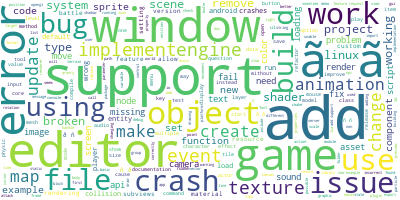

In [3]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(issues['title_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [23]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'add', 'game', 'fix', 'bug', 'error', 'editor', 'support', 'new', 'api', 'issues', 'ã', 'system'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = issues.title_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['back', 'multiple', 'platform', 'specific', 'impl', 'classes']


In [24]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [27]:
from pprint import pprint
# number of topics
num_topics = 20
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"project" + 0.006*"files" + 0.006*"custom" + 0.005*"using" + '
  '0.005*"work" + 0.005*"character" + 0.004*"linux" + 0.004*"feature" + '
  '0.004*"window" + 0.004*"rendering"'),
 (1,
  '0.009*"map" + 0.008*"crash" + 0.007*"broken" + 0.006*"example" + '
  '0.006*"build" + 0.006*"files" + 0.006*"using" + 0.005*"file" + '
  '0.005*"image" + 0.005*"make"'),
 (2,
  '0.007*"build" + 0.006*"file" + 0.006*"loading" + 0.006*"create" + '
  '0.006*"map" + 0.006*"scene" + 0.005*"allow" + 0.005*"events" + '
  '0.005*"engine" + 0.005*"camera"'),
 (3,
  '0.006*"cannot" + 0.005*"android" + 0.005*"build" + 0.005*"time" + '
  '0.004*"menu" + 0.004*"example" + 0.004*"map" + 0.004*"mode" + '
  '0.004*"refactor" + 0.004*"actor"'),
 (4,
  '0.009*"linux" + 0.008*"animation" + 0.007*"crash" + 0.006*"engine" + '
  '0.006*"size" + 0.006*"window" + 0.006*"asset" + 0.005*"object" + '
  '0.005*"battle" + 0.005*"ui"'),
 (5,
  '0.015*"engine" + 0.006*"broken" + 0.006*"objects" + 0.005*"build" + '
  '0.

In [28]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\gabre\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.016991 -0.018584       1        1  5.503202
9      0.011586  0.048308       2        1  5.489101
18    -0.024904 -0.005137       3        1  5.361770
12     0.004356  0.053265       4        1  5.309376
4      0.012534 -0.045358       5        1  5.259376
19     0.010656 -0.067760       6        1  5.231225
11     0.013308 -0.044059       7        1  5.164731
8      0.019100  0.016813       8        1  5.060156
10     0.042012 -0.033405       9        1  5.051282
17     0.022464 -0.096903      10        1  5.043980
0      0.039965  0.042034      11        1  4.986686
2     -0.038586 -0.012564      12        1  4.928184
5      0.025698  0.023513      13        1  4.919997
6     -0.055130  0.027891      14        1  4.915334
15    -0.089441 -0.008862      15        1  4.831644
7      0.030784 -0.014412      16        1  4.790648
3     -0.066816  0.070746      17        1  4.743554
14     0.000288  0.025799      18        1  4.723176
13    -0.054593 -0.015699      19        1  4.435422
16     0.113709  0.054374      20        1  4.251157, topic_info=          Term        Freq       Total Category  logprob  loglift
206     screen  356.000000  356.000000  Default  30.0000  30.0000
199     engine  614.000000  614.000000  Default  29.0000  29.0000
124  animation  382.000000  382.000000  Default  28.0000  28.0000
174     opengl  214.000000  214.000000  Default  27.0000  27.0000
570    project  334.000000  334.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
6    component   13.217962  209.652369  Topic20  -6.0345   0.3941
259       load   13.224165  210.354099  Topic20  -6.0340   0.3912
161    request   12.947184  192.469288  Topic20  -6.0552   0.4589
59       input   13.118818  226.670324  Topic20  -6.0420   0.3085
96      window   13.471175  394.766431  Topic20  -6.0155  -0.2198

[1530 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
15711      6  0.889068      aas
594        1  0.040275  ability
594        2  0.060413  ability
594        3  0.070482  ability
594        4  0.010069  ability
...      ...       ...      ...
3855      14  0.103694      ð¾ð
3855      15  0.069130      ð¾ð
3855      17  0.207389      ð¾ð
3855      18  0.034565      ð¾ð
3855      19  0.120977      ð¾ð

[7291 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 19, 13, 5, 20, 12, 9, 11, 18, 1, 3, 6, 7, 16, 8, 4, 15, 14, 17])